# Reconcile annotations for the RBC-GEM

## Setup
### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from rbc_gem_utils import (
    COBRA_CONFIGURATION,
    ROOT_PATH,
    ANNOTATION_PATH,
    MODEL_PATH,
    INTERIM_PATH,
    read_rbc_model,
    compare_tables,
    visualize_comparison,
)

### Define configuration
#### COBRA Configuration

In [2]:
COBRA_CONFIGURATION

Attribute,Description,Value
solver,Mathematical optimization solver,gurobi
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,15
cache_directory,Path for the model cache,/Users/zhaiman/Library/Caches/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


## Load RBC-GEM model
### Current Version: 0.2.0

In [3]:
model = read_rbc_model(filetype="xml")
model.reactions.sort()
model.genes.sort()
model.metabolites.sort()
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-28


Name,iAB_RBC_283
Memory address,1460518b0
Number of metabolites,342
Number of reactions,469
Number of genes,349
Number of groups,33
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


## Create annotation tables

In [4]:
annotation_dirpath = f"{ROOT_PATH}{ANNOTATION_PATH}"
compare = True
overwrite = False
model_annotation_dfs = {
    "reactions": None,
    "metabolites": None,
    "genes": None,
}
to_double_check = {
    "reactions": {},
    "metabolites": {},
    "genes": {},
}

### Reactions

In [5]:
annotation_type = "reactions"
databases = []
df_annotations = pd.read_csv(
    f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
    sep="\t", 
    index_col=0,
    dtype=str,
)
df_annotations = df_annotations.set_index(annotation_type)
df_annotations.rename({c: f"{c}_MODEL" for c in df_annotations.columns}, axis=1)

for db_tag in databases:
    df = pd.read_csv(
        f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv", 
        sep="\t",
        index_col=0,
        dtype=str,
    ).set_index(annotation_type)
    df.columns = [f"{c}_{db_tag}" for c in df.columns]
    df_annotations = df_annotations.merge(
        df,
        left_index=True,
        right_index=True,
        how="left",
    )

# Keep database tags on duplicate columns for reconcilliation, remove for unique columns
unique_columns = set([name.rsplit("_", 1)[0] for name in df_annotations.columns])
to_double_check[annotation_type] = {
    unique: [
        name for name in df_annotations.columns
        if name.rsplit("_", 1)[0] == unique
    ] for unique in unique_columns
}
unique_mapping = {
    to_double_check[annotation_type].pop(unique).pop(): unique
    for unique, dbs in to_double_check[annotation_type].copy().items()
    if len(dbs) == 1
}
print(f"Annotation columns to reconcile: {to_double_check[annotation_type]}")
df_annotations

Annotation columns to reconcile: {}


,bigg.reaction,biocyc,ec-code,kegg.reaction,metanetx.reaction,metatlas,reactome.reaction,rhea,sabiork,sbo,seed.reaction
reactions,,,,,,,,,,,
3MOXTYRESSte,3MOXTYRESSte,NaN,NaN,NaN,MNXR94930,MAR11306,NaN,NaN,NaN,SBO:0000185,NaN
4PYRDXABCte,4PYRDX,NaN,NaN,NaN,MNXR95053,MAR08103,NaN,NaN,NaN,SBO:0000185,NaN
5AOPt2,5AOPt2,NaN,NaN,NaN,MNXR95061,MAR11307,NaN,NaN,NaN,SBO:0000185,rxn09702
ACALDt,ACALDt,NaN,NaN,NaN,MNXR95212,MAR04948,R-HSA-449872,NaN,NaN,SBO:0000185,rxn09700;rxn08033;rxn13212;rxn08032
ACGAM2E,ACGAM2E,META:RXN-16006,5.1.3.8,R01207,MNXR95247,MAR04527,NaN,NaN,1441,SBO:0000176,rxn00897
...,...,...,...,...,...,...,...,...,...,...,...
UREAt,UREAt,META:TRANS-RXN0-460,NaN,NaN,MNXR105156,MAR04949,R-DRE-444126;R-XTR-444126;R-SSC-507873;R-GGA-5...,32802;32799;32801;32800,NaN,SBO:0000185,rxn09369;rxn05667;rxn09368
URIt,URIt,NaN,NaN,NaN,MNXR105165,MAR05035,NaN,NaN,NaN,SBO:0000185,rxn10987;rxn09372
XYLK,XYLK,META:XYLULOKIN-RXN,2.7.1.17,R01639,MNXR105255,MAR04595,R-RNO-5662466;R-CEL-5662466;R-BTA-5662466;R-CF...,10966;10965;10964;10967,NaN,SBO:0000176,rxn01199


#### Reconcile columns

In [6]:
# Fix namespaces
unique_mapping["reactome.reaction"] = "reactome"
unique_mapping["sabiork"] = "sabiork.reaction"
# Overwrite 
df_annotations = df_annotations.rename(unique_mapping, axis=1)
df_annotations = df_annotations.drop([x for x in df_annotations.columns if x == "REMOVE"], axis=1)
df_annotations = df_annotations.reset_index(drop=False)
model_annotation_dfs[annotation_type] = df_annotations
df_annotations

,reactions,bigg.reaction,biocyc,ec-code,kegg.reaction,metanetx.reaction,metatlas,reactome,rhea,sabiork.reaction,sbo,seed.reaction
0,3MOXTYRESSte,3MOXTYRESSte,NaN,NaN,NaN,MNXR94930,MAR11306,NaN,NaN,NaN,SBO:0000185,NaN
1,4PYRDXABCte,4PYRDX,NaN,NaN,NaN,MNXR95053,MAR08103,NaN,NaN,NaN,SBO:0000185,NaN
2,5AOPt2,5AOPt2,NaN,NaN,NaN,MNXR95061,MAR11307,NaN,NaN,NaN,SBO:0000185,rxn09702
3,ACALDt,ACALDt,NaN,NaN,NaN,MNXR95212,MAR04948,R-HSA-449872,NaN,NaN,SBO:0000185,rxn09700;rxn08033;rxn13212;rxn08032
4,ACGAM2E,ACGAM2E,META:RXN-16006,5.1.3.8,R01207,MNXR95247,MAR04527,NaN,NaN,1441,SBO:0000176,rxn00897
...,...,...,...,...,...,...,...,...,...,...,...,...
464,UREAt,UREAt,META:TRANS-RXN0-460,NaN,NaN,MNXR105156,MAR04949,R-DRE-444126;R-XTR-444126;R-SSC-507873;R-GGA-5...,32802;32799;32801;32800,NaN,SBO:0000185,rxn09369;rxn05667;rxn09368
465,URIt,URIt,NaN,NaN,NaN,MNXR105165,MAR05035,NaN,NaN,NaN,SBO:0000185,rxn10987;rxn09372
466,XYLK,XYLK,META:XYLULOKIN-RXN,2.7.1.17,R01639,MNXR105255,MAR04595,R-RNO-5662466;R-CEL-5662466;R-BTA-5662466;R-CF...,10966;10965;10964;10967,NaN,SBO:0000176,rxn01199
467,XYLTD_Dx,XYLTD_D,META:D-XYLULOSE-REDUCTASE-RXN,1.1.1.14;1.1.1.9,R01896,MNXR105262,MAR04593,R-HSA-5662471;R-XTR-5662471;R-DME-5662471;R-RN...,20435;20434;20433;20436,1954,SBO:0000176,rxn01385


#### Save annotations

,reactions,bigg.reaction,biocyc,ec-code,kegg.reaction,metanetx.reaction,metatlas,reactome,rhea,sabiork.reaction,sbo,seed.reaction
0,3MOXTYRESSte,3MOXTYRESSte,NaN,NaN,NaN,MNXR94930,MAR11306,NaN,NaN,NaN,SBO:0000185,NaN
1,4PYRDXABCte,4PYRDX,NaN,NaN,NaN,MNXR95053,MAR08103,NaN,NaN,NaN,SBO:0000185,NaN
2,5AOPt2,5AOPt2,NaN,NaN,NaN,MNXR95061,MAR11307,NaN,NaN,NaN,SBO:0000185,rxn09702
3,ACALDt,ACALDt,NaN,NaN,NaN,MNXR95212,MAR04948,R-HSA-449872,NaN,NaN,SBO:0000185,rxn09700;rxn08033;rxn13212;rxn08032
4,ACGAM2E,ACGAM2E,META:RXN-16006,5.1.3.8,R01207,MNXR95247,MAR04527,NaN,NaN,1441,SBO:0000176,rxn00897
...,...,...,...,...,...,...,...,...,...,...,...,...
464,UREAt,UREAt,META:TRANS-RXN0-460,NaN,NaN,MNXR105156,MAR04949,R-DRE-444126;R-XTR-444126;R-SSC-507873;R-GGA-5...,32802;32799;32801;32800,NaN,SBO:0000185,rxn09369;rxn05667;rxn09368
465,URIt,URIt,NaN,NaN,NaN,MNXR105165,MAR05035,NaN,NaN,NaN,SBO:0000185,rxn10987;rxn09372
466,XYLK,XYLK,META:XYLULOKIN-RXN,2.7.1.17,R01639,MNXR105255,MAR04595,R-RNO-5662466;R-CEL-5662466;R-BTA-5662466;R-CF...,10966;10965;10964;10967,NaN,SBO:0000176,rxn01199
467,XYLTD_Dx,XYLTD_D,META:D-XYLULOSE-REDUCTASE-RXN,1.1.1.14;1.1.1.9,R01896,MNXR105262,MAR04593,R-HSA-5662471;R-XTR-5662471;R-DME-5662471;R-RN...,20435;20434;20433;20436,1954,SBO:0000176,rxn01385


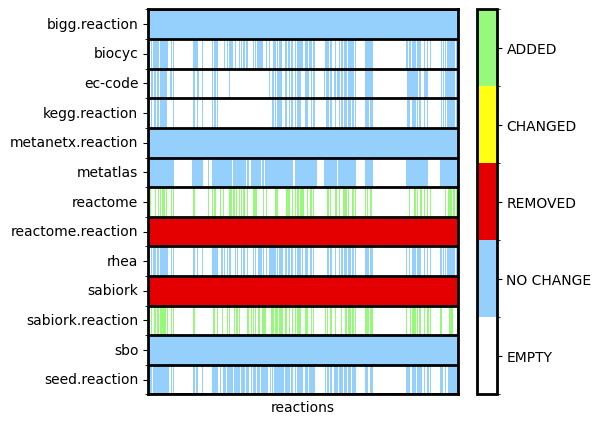

In [7]:
assert len(to_double_check[annotation_type]) == 0, f"There are still columns with data that need reconcilliation: {to_double_check[annotation_type]}"
df_annotations = model_annotation_dfs[annotation_type]

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type])
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Metabolites

In [8]:
annotation_type = "metabolites"
databases = []


df_annotations = pd.read_csv(
    f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
    sep="\t", 
    index_col=0
)
df_annotations = df_annotations.set_index(annotation_type)
df_annotations.rename({c: f"{c}_MODEL" for c in df_annotations.columns}, axis=1)

for db_tag in databases:
    df = pd.read_csv(
        f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv", 
        sep="\t",
        index_col=0,
        dtype=str,
    ).set_index(annotation_type)
    df.columns = [f"{c}_{db_tag}" for c in df.columns]
    df_annotations = df_annotations.merge(
        df,
        left_index=True,
        right_index=True,
        how="left",
    )

# Keep database tags on duplicate columns for reconcilliation, remove for unique columns
unique_columns = set([name.rsplit("_", 1)[0] for name in df_annotations.columns])
to_double_check[annotation_type] = {
    unique: [
        name for name in df_annotations.columns
        if name.rsplit("_", 1)[0] == unique
    ] for unique in unique_columns
}
unique_mapping = {
    to_double_check[annotation_type].pop(unique).pop(): unique
    for unique, dbs in to_double_check[annotation_type].copy().items()
    if len(dbs) == 1
}
print(f"Annotation columns to reconcile: {to_double_check[annotation_type]}")
df_annotations

Annotation columns to reconcile: {}


,bigg.metabolite,biocyc,chebi,envipath,hmdb,inchi_key,kegg.compound,kegg.drug,kegg.glycan,lipidmaps,metanetx.chemical,metatlas,reactome.compound,sabiork,sbo,seed.compound,slm
metabolites,,,,,,,,,,,,,,,,,
13dpg_c,13dpg,META:DPG,CHEBI:57604;CHEBI:20189;CHEBI:11881;CHEBI:1600...,NaN,HMDB62758,LJQLQCAXBUHEAZ-UWTATZPHSA-J,C00236,NaN,NaN,NaN,MNXM261,MAM00247c,29800,21215,SBO:0000247,cpd00203,NaN
23dpg_c,23dpg,META:23-DIPHOSPHOGLYCERATE,CHEBI:41885;CHEBI:11417;CHEBI:19307;CHEBI:1930...,NaN,HMDB01294,XOHUEYCVLUUEJJ-UWTATZPHSA-I,C03339;C01159,NaN,NaN,NaN,MNXM892,MAM00569c,6798337,20899;1355,SBO:0000247,cpd00853;cpd02119,NaN
2kmb_c,2kmb,META:CPD-479,CHEBI:43720;CHEBI:22458;CHEBI:1902;CHEBI:63388...,NaN,HMDB01553;HMDB13210,SXFSQZDSUWACKX-UHFFFAOYSA-M,C01180,NaN,NaN,LMFA01060170,MNXM276,MAM01016c,1237122,5424,SBO:0000247,cpd00869,NaN
2pg_c,2pg,META:2-PG,CHEBI:39868;CHEBI:21028;CHEBI:58289;CHEBI:2434...,NaN,HMDB00362;HMDB62707;HMDB03391,GXIURPTVHJPJLF-UWTATZPHSA-K,C00631,NaN,NaN,NaN,MNXM275,MAM00674c,30485,31,SBO:0000247,cpd00482,NaN
35camp_c,camp,META:CAMP,CHEBI:19827;CHEBI:11673;CHEBI:1325;CHEBI:17489...,NaN,HMDB00058,IVOMOUWHDPKRLL-KQYNXXCUSA-M,C00575,NaN,NaN,NaN,MNXM243,MAM01419c,30389,1379,SBO:0000247,cpd00446,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xmp_c,xmp,META:XANTHOSINE-5-PHOSPHATE,CHEBI:10938;CHEBI:57464;CHEBI:27328;CHEBI:1532...,NaN,HMDB01554;HMDB62755,DCTLYFZHFGENCW-UUOKFMHZSA-L,C00655,NaN,NaN,NaN,MNXM298,MAM03150c,111584,1686,SBO:0000247,cpd00497,NaN
xu5p__D_c,xu5p__D,META:XYLULOSE-5-PHOSPHATE,CHEBI:13036;CHEBI:27354;CHEBI:4269;CHEBI:16332...,NaN,HMDB06212;HMDB00868,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,C00231,NaN,NaN,NaN,MNXM186,MAM01761c,29790,1317,SBO:0000247,cpd00198,NaN
xylt_c,xylt,META:XYLITOL,CHEBI:15328;CHEBI:17151;CHEBI:10078;CHEBI:6093...,NaN,NaN,HEBKCHPVOIAQTA-SCDXWVJYSA-N,C00379,D00061,NaN,NaN,MNXM510,MAM03155c,5660033,2033,SBO:0000247,cpd00306,NaN


#### Reconcile columns

In [9]:
# Fix namespaces
unique_mapping["inchi_key"] = "inchikey"
unique_mapping["reactome.compound"] = "reactome"
unique_mapping["sabiork"] = "sabiork.compound"

# Overwrite 
df_annotations = df_annotations.rename(unique_mapping, axis=1)
df_annotations = df_annotations.drop([x for x in df_annotations.columns if x == "REMOVE"], axis=1)
df_annotations = df_annotations.reset_index(drop=False)
model_annotation_dfs[annotation_type] = df_annotations
df_annotations

,metabolites,bigg.metabolite,biocyc,chebi,envipath,hmdb,inchikey,kegg.compound,kegg.drug,kegg.glycan,lipidmaps,metanetx.chemical,metatlas,reactome,sabiork.compound,sbo,seed.compound,slm
0,13dpg_c,13dpg,META:DPG,CHEBI:57604;CHEBI:20189;CHEBI:11881;CHEBI:1600...,NaN,HMDB62758,LJQLQCAXBUHEAZ-UWTATZPHSA-J,C00236,NaN,NaN,NaN,MNXM261,MAM00247c,29800,21215,SBO:0000247,cpd00203,NaN
1,23dpg_c,23dpg,META:23-DIPHOSPHOGLYCERATE,CHEBI:41885;CHEBI:11417;CHEBI:19307;CHEBI:1930...,NaN,HMDB01294,XOHUEYCVLUUEJJ-UWTATZPHSA-I,C03339;C01159,NaN,NaN,NaN,MNXM892,MAM00569c,6798337,20899;1355,SBO:0000247,cpd00853;cpd02119,NaN
2,2kmb_c,2kmb,META:CPD-479,CHEBI:43720;CHEBI:22458;CHEBI:1902;CHEBI:63388...,NaN,HMDB01553;HMDB13210,SXFSQZDSUWACKX-UHFFFAOYSA-M,C01180,NaN,NaN,LMFA01060170,MNXM276,MAM01016c,1237122,5424,SBO:0000247,cpd00869,NaN
3,2pg_c,2pg,META:2-PG,CHEBI:39868;CHEBI:21028;CHEBI:58289;CHEBI:2434...,NaN,HMDB00362;HMDB62707;HMDB03391,GXIURPTVHJPJLF-UWTATZPHSA-K,C00631,NaN,NaN,NaN,MNXM275,MAM00674c,30485,31,SBO:0000247,cpd00482,NaN
4,35camp_c,camp,META:CAMP,CHEBI:19827;CHEBI:11673;CHEBI:1325;CHEBI:17489...,NaN,HMDB00058,IVOMOUWHDPKRLL-KQYNXXCUSA-M,C00575,NaN,NaN,NaN,MNXM243,MAM01419c,30389,1379,SBO:0000247,cpd00446,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,xmp_c,xmp,META:XANTHOSINE-5-PHOSPHATE,CHEBI:10938;CHEBI:57464;CHEBI:27328;CHEBI:1532...,NaN,HMDB01554;HMDB62755,DCTLYFZHFGENCW-UUOKFMHZSA-L,C00655,NaN,NaN,NaN,MNXM298,MAM03150c,111584,1686,SBO:0000247,cpd00497,NaN
338,xu5p__D_c,xu5p__D,META:XYLULOSE-5-PHOSPHATE,CHEBI:13036;CHEBI:27354;CHEBI:4269;CHEBI:16332...,NaN,HMDB06212;HMDB00868,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,C00231,NaN,NaN,NaN,MNXM186,MAM01761c,29790,1317,SBO:0000247,cpd00198,NaN
339,xylt_c,xylt,META:XYLITOL,CHEBI:15328;CHEBI:17151;CHEBI:10078;CHEBI:6093...,NaN,NaN,HEBKCHPVOIAQTA-SCDXWVJYSA-N,C00379,D00061,NaN,NaN,MNXM510,MAM03155c,5660033,2033,SBO:0000247,cpd00306,NaN
340,xylu__D_c,xylu__D,META:D-XYLULOSE,CHEBI:4268;CHEBI:13035;CHEBI:46514;CHEBI:21120...,NaN,HMDB01644;HMDB00654,ZAQJHHRNXZUBTE-WUJLRWPWSA-N,C00310,NaN,NaN,NaN,MNXM597,MAM01759c,5661281,1504,SBO:0000247,cpd00259,NaN


#### Save annotations

,metabolites,bigg.metabolite,biocyc,chebi,envipath,hmdb,inchikey,kegg.compound,kegg.drug,kegg.glycan,lipidmaps,metanetx.chemical,metatlas,reactome,sabiork.compound,sbo,seed.compound,slm
0,13dpg_c,13dpg,META:DPG,CHEBI:57604;CHEBI:20189;CHEBI:11881;CHEBI:1600...,NaN,HMDB62758,LJQLQCAXBUHEAZ-UWTATZPHSA-J,C00236,NaN,NaN,NaN,MNXM261,MAM00247c,29800,21215,SBO:0000247,cpd00203,NaN
1,23dpg_c,23dpg,META:23-DIPHOSPHOGLYCERATE,CHEBI:41885;CHEBI:11417;CHEBI:19307;CHEBI:1930...,NaN,HMDB01294,XOHUEYCVLUUEJJ-UWTATZPHSA-I,C03339;C01159,NaN,NaN,NaN,MNXM892,MAM00569c,6798337,20899;1355,SBO:0000247,cpd00853;cpd02119,NaN
2,2kmb_c,2kmb,META:CPD-479,CHEBI:43720;CHEBI:22458;CHEBI:1902;CHEBI:63388...,NaN,HMDB01553;HMDB13210,SXFSQZDSUWACKX-UHFFFAOYSA-M,C01180,NaN,NaN,LMFA01060170,MNXM276,MAM01016c,1237122,5424,SBO:0000247,cpd00869,NaN
3,2pg_c,2pg,META:2-PG,CHEBI:39868;CHEBI:21028;CHEBI:58289;CHEBI:2434...,NaN,HMDB00362;HMDB62707;HMDB03391,GXIURPTVHJPJLF-UWTATZPHSA-K,C00631,NaN,NaN,NaN,MNXM275,MAM00674c,30485,31,SBO:0000247,cpd00482,NaN
4,35camp_c,camp,META:CAMP,CHEBI:19827;CHEBI:11673;CHEBI:1325;CHEBI:17489...,NaN,HMDB00058,IVOMOUWHDPKRLL-KQYNXXCUSA-M,C00575,NaN,NaN,NaN,MNXM243,MAM01419c,30389,1379,SBO:0000247,cpd00446,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,xmp_c,xmp,META:XANTHOSINE-5-PHOSPHATE,CHEBI:10938;CHEBI:57464;CHEBI:27328;CHEBI:1532...,NaN,HMDB01554;HMDB62755,DCTLYFZHFGENCW-UUOKFMHZSA-L,C00655,NaN,NaN,NaN,MNXM298,MAM03150c,111584,1686,SBO:0000247,cpd00497,NaN
338,xu5p__D_c,xu5p__D,META:XYLULOSE-5-PHOSPHATE,CHEBI:13036;CHEBI:27354;CHEBI:4269;CHEBI:16332...,NaN,HMDB06212;HMDB00868,FNZLKVNUWIIPSJ-RFZPGFLSSA-L,C00231,NaN,NaN,NaN,MNXM186,MAM01761c,29790,1317,SBO:0000247,cpd00198,NaN
339,xylt_c,xylt,META:XYLITOL,CHEBI:15328;CHEBI:17151;CHEBI:10078;CHEBI:6093...,NaN,NaN,HEBKCHPVOIAQTA-SCDXWVJYSA-N,C00379,D00061,NaN,NaN,MNXM510,MAM03155c,5660033,2033,SBO:0000247,cpd00306,NaN
340,xylu__D_c,xylu__D,META:D-XYLULOSE,CHEBI:4268;CHEBI:13035;CHEBI:46514;CHEBI:21120...,NaN,HMDB01644;HMDB00654,ZAQJHHRNXZUBTE-WUJLRWPWSA-N,C00310,NaN,NaN,NaN,MNXM597,MAM01759c,5661281,1504,SBO:0000247,cpd00259,NaN


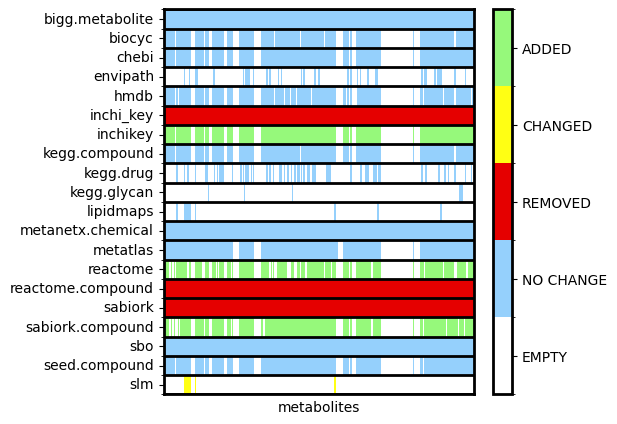

In [10]:
assert len(to_double_check[annotation_type]) == 0, f"There are still columns with data that need reconcilliation: {to_double_check[annotation_type]}"
df_annotations = model_annotation_dfs[annotation_type]

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type])
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations

### Genes

In [11]:
annotation_type = "genes"
databases = ["UniProt"]
objects = model.reactions
df_annotations = pd.read_csv(
    f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
    sep="\t", 
    index_col=0,
    dtype=str,
)
df_annotations = df_annotations.set_index(annotation_type)
df_annotations = df_annotations.rename({c: f"{c}_MODEL" for c in df_annotations.columns}, axis=1)

for db_tag in databases:
    df = pd.read_csv(
        f"{annotation_dirpath}/{annotation_type}_{db_tag}.tsv", 
        sep="\t",
        index_col=0,
        dtype=str,
    ).set_index(annotation_type)
    df.columns = [f"{c}_{db_tag}" for c in df.columns]
    df_annotations = df_annotations.merge(
        df,
        left_index=True,
        right_index=True,
        how="outer",
    )

# Keep database tags on duplicate columns for reconcilliation, remove for unique columns
unique_columns = set([name.rsplit("_", 1)[0] for name in df_annotations.columns])
to_double_check[annotation_type] = {
    unique: [
        name for name in df_annotations.columns
        if name.rsplit("_", 1)[0] == unique
    ] for unique in unique_columns
}
unique_mapping = {
    to_double_check[annotation_type].pop(unique).pop(): unique
    for unique, dbs in to_double_check[annotation_type].copy().items()
    if len(dbs) == 1
}
print(f"Annotation columns to reconcile: {to_double_check[annotation_type]}")
df_annotations

Annotation columns to reconcile: {'ncbigene': ['ncbigene_MODEL', 'ncbigene_UniProt'], 'ccds': ['ccds_MODEL', 'ccds_UniProt']}


,ccds_MODEL,hprd_MODEL,ncbigene_MODEL,ncbigi_MODEL,omim_MODEL,refseq_name_MODEL,refseq_synonym_MODEL,sbo_MODEL,uniprot_UniProt,uniprot.isoform_UniProt,hgnc.symbol_UniProt,ncbigene_UniProt,ccds_UniProt,refseq_UniProt,mim_UniProt,drugbank_UniProt
genes,,,,,,,,,,,,,,,,
10007_AT1,CCDS4272.1,09048,10007,NaN,601798,GNPDA1,GPI;HLN;GNP1;GNPI;GNPDA,SBO:0000243,P46926,P46926-1,GNPDA1,10007,CCDS4272.1,NP_005462.1;XP_006714810.1,601798,DB02445;DB02379;DB03951
100_AT1,CCDS13335.1,NaN,100,NaN,608958,ADA,NaN,SBO:0000243,P00813,P00813-1,ADA,100,CCDS13335.1,NP_000013.2,102700;608958,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...
10201_AT1,CCDS2763.1;CCDS77734.1;CCDS77733.1,NaN,10201,NaN,608294,NME6,NM23-H6;IPIA-ALPHA;NDK 6,SBO:0000243,O75414,O75414-1,NME6,10201,CCDS77734.1,NP_001295355.1;NP_001295356.1;NP_001295357.1,608294,NaN
10257_AT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SBO:0000243,O15439,O15439-1,ABCC4,10257,CCDS9474.1,NP_005836.2,605250,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...
10327_AT1,CCDS523.1,NaN,10327,NaN,103830,AKR1A1,DD3;HEL-S-6;ALDR1;ARM;ALR,SBO:0000243,P14550,P14550-1,AKR1A1,10327,CCDS523.1,NP_001189342.1;NP_001189343.1;NP_006057.1;NP_6...,103830,DB08904;DB09130;DB00997;DB00898;DB06077;DB0015...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867_AT2,CCDS54484.1;CCDS54483.1;CCDS33540.2;CCDS33539.2,NaN,8867,NaN,604297,SYNJ1,PARK20;INPP5G,SBO:0000243,O43426,O43426-2,SYNJ1,8867,CCDS33540.3,NP_982271.2,604297;615530;617389,NaN
9162_AT1,CCDS5845.1,07238,9162,1012282641;1034657385;1034657393;1034657397;10...,604072,DGKI,DGK-IOTA,SBO:0000243,O75912,O75912-1,DGKI,9162,CCDS5845.1,NP_001308637.1;NP_001308638.1;NP_001308639.1;N...,604072,DB14001
9429_AT1,CCDS58910.1;CCDS3628.1,NaN,9429,NaN,603756,ABCG2,MRX;CD338;BCRP1;MXR;GOUT1;ABCP;ABC15;CDw338;BC...,SBO:0000243,Q9UNQ0,Q9UNQ0-1,ABCG2,9429,CCDS3628.1,NP_004818.2;XP_011530722.1,138900;603756;614490,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...


#### Reconcile columns

In [12]:
# Remove columns that are not MIRIAM
unique_mapping["refseq_name_MODEL"] = "REMOVE"
unique_mapping["refseq_synonym_MODEL"] = "REMOVE"

# # Fix namespaces to MIRIAM
# unique_mapping["inchi_key"] = "inchikey"
# unique_mapping["reactome.compound"] = "reactome"
# unique_mapping["sabiork"] = "sabiork.compound"

# Replace model columns with new columns for UniProt
unique_mapping["ccds_MODEL"] = "REMOVE"
unique_mapping["ccds_UniProt"] = "ccds"
del to_double_check[annotation_type]["ccds"]

unique_mapping["ncbigene_MODEL"] = "REMOVE"
unique_mapping["ncbigene_UniProt"] = "ncbigene"
del to_double_check[annotation_type]["ncbigene"]

# Overwrite 
df_annotations = df_annotations.rename(unique_mapping, axis=1)
df_annotations = df_annotations.drop([x for x in df_annotations.columns if x == "REMOVE"], axis=1)
df_annotations = df_annotations.reset_index(drop=False)
model_annotation_dfs[annotation_type] = df_annotations
df_annotations

,genes,hprd,ncbigi,omim,sbo,uniprot,uniprot.isoform,hgnc.symbol,ncbigene,ccds,refseq,mim,drugbank
0,10007_AT1,09048,NaN,601798,SBO:0000243,P46926,P46926-1,GNPDA1,10007,CCDS4272.1,NP_005462.1;XP_006714810.1,601798,DB02445;DB02379;DB03951
1,100_AT1,NaN,NaN,608958,SBO:0000243,P00813,P00813-1,ADA,100,CCDS13335.1,NP_000013.2,102700;608958,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...
2,10201_AT1,NaN,NaN,608294,SBO:0000243,O75414,O75414-1,NME6,10201,CCDS77734.1,NP_001295355.1;NP_001295356.1;NP_001295357.1,608294,NaN
3,10257_AT1,NaN,NaN,NaN,SBO:0000243,O15439,O15439-1,ABCC4,10257,CCDS9474.1,NP_005836.2,605250,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...
4,10327_AT1,NaN,NaN,103830,SBO:0000243,P14550,P14550-1,AKR1A1,10327,CCDS523.1,NP_001189342.1;NP_001189343.1;NP_006057.1;NP_6...,103830,DB08904;DB09130;DB00997;DB00898;DB06077;DB0015...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,8867_AT2,NaN,NaN,604297,SBO:0000243,O43426,O43426-2,SYNJ1,8867,CCDS33540.3,NP_982271.2,604297;615530;617389,NaN
345,9162_AT1,07238,1012282641;1034657385;1034657393;1034657397;10...,604072,SBO:0000243,O75912,O75912-1,DGKI,9162,CCDS5845.1,NP_001308637.1;NP_001308638.1;NP_001308639.1;N...,604072,DB14001
346,9429_AT1,NaN,NaN,603756,SBO:0000243,Q9UNQ0,Q9UNQ0-1,ABCG2,9429,CCDS3628.1,NP_004818.2;XP_011530722.1,138900;603756;614490,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...
347,9468_AT1,05376,NaN,300948,SBO:0000243,Q9Y5K3,Q9Y5K3-1,PCYT1B,9468,CCDS14213.1,NP_004836.2,300948,DB00122;DB14006


In [13]:
try:
    df_previous = pd.read_csv(
        f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
        sep="\t", 
        index_col=0
    )
except FileNotFoundError:
    df_previous = pd.DataFrame([], columns=[annotation_type])
df_previous

,genes,ccds,hprd,ncbigene,ncbigi,omim,refseq_name,refseq_synonym,sbo
0,10007_AT1,CCDS4272.1,9048.0,10007.0,NaN,601798.0,GNPDA1,GPI;HLN;GNP1;GNPI;GNPDA,SBO:0000243
1,100_AT1,CCDS13335.1,NaN,100.0,NaN,608958.0,ADA,NaN,SBO:0000243
2,10201_AT1,CCDS2763.1;CCDS77734.1;CCDS77733.1,NaN,10201.0,NaN,608294.0,NME6,NM23-H6;IPIA-ALPHA;NDK 6,SBO:0000243
3,10257_AT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SBO:0000243
4,10327_AT1,CCDS523.1,NaN,10327.0,NaN,103830.0,AKR1A1,DD3;HEL-S-6;ALDR1;ARM;ALR,SBO:0000243
...,...,...,...,...,...,...,...,...,...
344,8867_AT2,CCDS54484.1;CCDS54483.1;CCDS33540.2;CCDS33539.2,NaN,8867.0,NaN,604297.0,SYNJ1,PARK20;INPP5G,SBO:0000243
345,9162_AT1,CCDS5845.1,7238.0,9162.0,1012282641;1034657385;1034657393;1034657397;10...,604072.0,DGKI,DGK-IOTA,SBO:0000243
346,9429_AT1,CCDS58910.1;CCDS3628.1,NaN,9429.0,NaN,603756.0,ABCG2,MRX;CD338;BCRP1;MXR;GOUT1;ABCP;ABC15;CDw338;BC...,SBO:0000243
347,9468_AT1,CCDS14213.1;CCDS55392.1;CCDS55391.1,5376.0,9468.0,NaN,300948.0,PCYT1B,CTB;CCTB,SBO:0000243


In [14]:
df_annotations

,genes,hprd,ncbigi,omim,sbo,uniprot,uniprot.isoform,hgnc.symbol,ncbigene,ccds,refseq,mim,drugbank
0,10007_AT1,09048,NaN,601798,SBO:0000243,P46926,P46926-1,GNPDA1,10007,CCDS4272.1,NP_005462.1;XP_006714810.1,601798,DB02445;DB02379;DB03951
1,100_AT1,NaN,NaN,608958,SBO:0000243,P00813,P00813-1,ADA,100,CCDS13335.1,NP_000013.2,102700;608958,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...
2,10201_AT1,NaN,NaN,608294,SBO:0000243,O75414,O75414-1,NME6,10201,CCDS77734.1,NP_001295355.1;NP_001295356.1;NP_001295357.1,608294,NaN
3,10257_AT1,NaN,NaN,NaN,SBO:0000243,O15439,O15439-1,ABCC4,10257,CCDS9474.1,NP_005836.2,605250,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...
4,10327_AT1,NaN,NaN,103830,SBO:0000243,P14550,P14550-1,AKR1A1,10327,CCDS523.1,NP_001189342.1;NP_001189343.1;NP_006057.1;NP_6...,103830,DB08904;DB09130;DB00997;DB00898;DB06077;DB0015...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,8867_AT2,NaN,NaN,604297,SBO:0000243,O43426,O43426-2,SYNJ1,8867,CCDS33540.3,NP_982271.2,604297;615530;617389,NaN
345,9162_AT1,07238,1012282641;1034657385;1034657393;1034657397;10...,604072,SBO:0000243,O75912,O75912-1,DGKI,9162,CCDS5845.1,NP_001308637.1;NP_001308638.1;NP_001308639.1;N...,604072,DB14001
346,9429_AT1,NaN,NaN,603756,SBO:0000243,Q9UNQ0,Q9UNQ0-1,ABCG2,9429,CCDS3628.1,NP_004818.2;XP_011530722.1,138900;603756;614490,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...
347,9468_AT1,05376,NaN,300948,SBO:0000243,Q9Y5K3,Q9Y5K3-1,PCYT1B,9468,CCDS14213.1,NP_004836.2,300948,DB00122;DB14006


#### Save annotations

,genes,hprd,ncbigi,omim,sbo,uniprot,uniprot.isoform,hgnc.symbol,ncbigene,ccds,refseq,mim,drugbank
0,10007_AT1,09048,NaN,601798,SBO:0000243,P46926,P46926-1,GNPDA1,10007,CCDS4272.1,NP_005462.1;XP_006714810.1,601798,DB02445;DB02379;DB03951
1,100_AT1,NaN,NaN,608958,SBO:0000243,P00813,P00813-1,ADA,100,CCDS13335.1,NP_000013.2,102700;608958,DB07711;DB07783;DB07786;DB04218;DB07785;DB0301...
2,10201_AT1,NaN,NaN,608294,SBO:0000243,O75414,O75414-1,NME6,10201,CCDS77734.1,NP_001295355.1;NP_001295356.1;NP_001295357.1,608294,NaN
3,10257_AT1,NaN,NaN,NaN,SBO:0000243,O15439,O15439-1,ABCC4,10257,CCDS9474.1,NP_005836.2,605250,DB00718;DB00770;DB01076;DB00171;DB01327;DB0048...
4,10327_AT1,NaN,NaN,103830,SBO:0000243,P14550,P14550-1,AKR1A1,10327,CCDS523.1,NP_001189342.1;NP_001189343.1;NP_006057.1;NP_6...,103830,DB08904;DB09130;DB00997;DB00898;DB06077;DB0015...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,8867_AT2,NaN,NaN,604297,SBO:0000243,O43426,O43426-2,SYNJ1,8867,CCDS33540.3,NP_982271.2,604297;615530;617389,NaN
345,9162_AT1,07238,1012282641;1034657385;1034657393;1034657397;10...,604072,SBO:0000243,O75912,O75912-1,DGKI,9162,CCDS5845.1,NP_001308637.1;NP_001308638.1;NP_001308639.1;N...,604072,DB14001
346,9429_AT1,NaN,NaN,603756,SBO:0000243,Q9UNQ0,Q9UNQ0-1,ABCG2,9429,CCDS3628.1,NP_004818.2;XP_011530722.1,138900;603756;614490,DB12001;DB08916;DB11363;DB00437;DB12015;DB0349...
347,9468_AT1,05376,NaN,300948,SBO:0000243,Q9Y5K3,Q9Y5K3-1,PCYT1B,9468,CCDS14213.1,NP_004836.2,300948,DB00122;DB14006


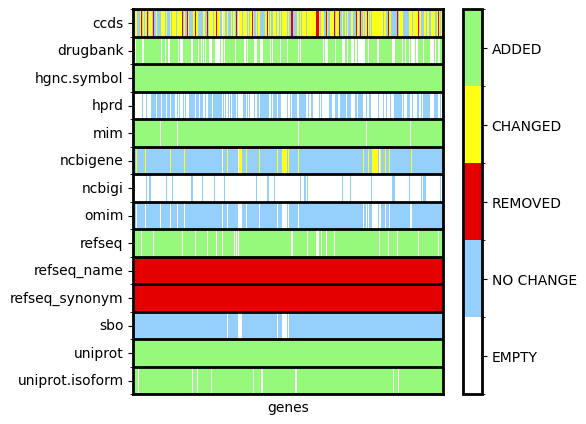

In [15]:
assert len(to_double_check[annotation_type]) == 0, f"There are still columns with data that need reconcilliation: {to_double_check[annotation_type]}"
df_annotations = model_annotation_dfs[annotation_type]

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv", 
            sep="\t", 
            index_col=0,
            dtype=str,
        )
    except FileNotFoundError:
        df_previous = pd.DataFrame([], columns=[annotation_type])
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_annotations.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_annotations.to_csv(f"{ROOT_PATH}{MODEL_PATH}/{annotation_type}.tsv",sep="\t")
else:
    df_annotations.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/{annotation_type}.tsv", sep="\t")
df_annotations